## Module 4

##### Problem 4.1
Import the csv file of the stock which contained the Bollinger columns as well.

- Create a new column 'Call' , whose entries are - 
    - 'Buy' if the stock price is below the lower Bollinger band 
    - 'Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band 
    - 'Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band 
    - 'Short' if the stock price is above the upper Bollinger band

In [1]:
import pandas as pd
import numpy as np

In [2]:
Hul_data=pd.read_csv("C:/Users/Lenovo/Desktop/ML INTERNSHIP/week3.csv")
Hul_data.head()

,Date,Symbol,Series,Date.1,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,...,% Dly Qt to Traded Qty,Month,Year,VWAP,Day_Perc_Change,Trend,14_day_avg,14_day_std,14_day_upper_band,14_day_lower_band
0,2017-05-15,HINDUNILVR,EQ,2017-05-15,980.20,981.3,988.85,974.55,982.5,983.25,...,57.21,5,2017,983.250000,0.000000,Slight or No change,NaN,NaN,NaN,NaN
1,2017-05-16,HINDUNILVR,EQ,2017-05-16,983.25,983.0,1002.50,982.05,999.5,1000.40,...,44.53,5,2017,994.772529,0.017442,Slight or No change,NaN,NaN,NaN,NaN
2,2017-05-17,HINDUNILVR,EQ,2017-05-17,1000.40,1004.0,1012.00,991.10,1009.0,1009.40,...,49.82,5,2017,1001.673993,0.008996,Slight or No change,NaN,NaN,NaN,NaN
3,2017-05-18,HINDUNILVR,EQ,2017-05-18,1009.40,1008.0,1009.00,983.00,987.5,990.25,...,36.55,5,2017,997.237115,-0.018972,Slight or No change,NaN,NaN,NaN,NaN
4,2017-05-19,HINDUNILVR,EQ,2017-05-19,990.25,1000.0,1022.75,1000.00,1004.1,1008.00,...,49.78,5,2017,1000.534181,0.017925,Slight or No change,NaN,NaN,NaN,NaN


In [3]:
## Defining a function
def call(Hul_data):
    if Hul_data['Close Price'] <= Hul_data['14_day_lower_band']: 
        return 'Buy'    
    if Hul_data['Close Price'] >= Hul_data['14_day_upper_band']: 
        return 'Short'
    if Hul_data['Close Price'] == Hul_data['14_day_upper_band']:
        return 'Hold'    
    if Hul_data['Close Price'] >  Hul_data['14_day_avg']:            
        return 'Hold Buy / Liquidate Short'
    if Hul_data['Close Price'] <  Hul_data['14_day_avg']:            
        return 'Hold Short / Liquidate Buy'

 ### Creating new column 'Call'   
Hul_data['Call'] = Hul_data.apply(call, axis=1) # applying call function to every row ## axis=1 is for column

In [4]:
Hul_data.head(16)

,Date,Symbol,Series,Date.1,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,...,Month,Year,VWAP,Day_Perc_Change,Trend,14_day_avg,14_day_std,14_day_upper_band,14_day_lower_band,Call
0,2017-05-15,HINDUNILVR,EQ,2017-05-15,980.20,981.30,988.85,974.55,982.50,983.25,...,5,2017,983.250000,0.000000,Slight or No change,NaN,NaN,NaN,NaN,None
1,2017-05-16,HINDUNILVR,EQ,2017-05-16,983.25,983.00,1002.50,982.05,999.50,1000.40,...,5,2017,994.772529,0.017442,Slight or No change,NaN,NaN,NaN,NaN,None
2,2017-05-17,HINDUNILVR,EQ,2017-05-17,1000.40,1004.00,1012.00,991.10,1009.00,1009.40,...,5,2017,1001.673993,0.008996,Slight or No change,NaN,NaN,NaN,NaN,None
3,2017-05-18,HINDUNILVR,EQ,2017-05-18,1009.40,1008.00,1009.00,983.00,987.50,990.25,...,5,2017,997.237115,-0.018972,Slight or No change,NaN,NaN,NaN,NaN,None
4,2017-05-19,HINDUNILVR,EQ,2017-05-19,990.25,1000.00,1022.75,1000.00,1004.10,1008.00,...,5,2017,1000.534181,0.017925,Slight or No change,NaN,NaN,NaN,NaN,None
5,2017-05-22,HINDUNILVR,EQ,2017-05-22,1008.00,1011.35,1028.20,1009.00,1019.80,1018.60,...,5,2017,1003.278033,0.010516,Slight or No change,NaN,NaN,NaN,NaN,None
6,2017-05-23,HINDUNILVR,EQ,2017-05-23,1018.60,1018.80,1032.00,1014.00,1023.50,1024.80,...,5,2017,1007.219124,0.006087,Slight or No change,NaN,NaN,NaN,NaN,None
7,2017-05-24,HINDUNILVR,EQ,2017-05-24,1024.80,1026.55,1040.00,1023.50,1038.05,1038.05,...,5,2017,1010.961986,0.012929,Slight or No change,NaN,NaN,NaN,NaN,None
8,2017-05-25,HINDUNILVR,EQ,2017-05-25,1038.05,1037.90,1050.00,1030.30,1045.00,1043.45,...,5,2017,1014.363090,0.005202,Slight or No change,NaN,NaN,NaN,NaN,None
9,2017-05-26,HINDUNILVR,EQ,2017-05-26,1043.45,1042.05,1046.95,1032.40,1041.00,1040.95,...,5,2017,1015.363248,-0.002396,Slight or No change,NaN,NaN,NaN,NaN,None


Now train a classification model with the 3 bollinger columns and the stock price as inputs and 'Calls' as output. Check the accuracy on a test set. (There are many classifier models to choose from, try each one out and compare the accuracy for each)

In [5]:
X = Hul_data.dropna()[['Close Price', '14_day_avg', '14_day_upper_band', '14_day_lower_band']]
y = Hul_data.dropna()['Call']   


## We standardise the data
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X = scale.fit_transform(X)

In [6]:
## Splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=20)

In [7]:
y_train.dtypes

dtype('O')

In [8]:
## Now we label encode the y column
from sklearn.preprocessing import LabelEncoder

le     = LabelEncoder()
y_train_label = le.fit_transform(y_train)
y_test_label=le.fit_transform(y_test)

In [9]:
## 1st we build a classification model with Random Forest Classifier
max_features = len(y.unique())## no. of different values in y

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

## the model
RDF=RandomForestClassifier(max_depth=4, n_estimators=15, max_features=max_features)
RDF.fit(X_train,y_train_label)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [10]:
## predicting values for test data 
RDF.predict(X_test)

array([2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2,
       2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1])

In [11]:
## Model evaluation of Random Forest
print("Random Forests")
print(RDF.score(X_test,y_test_label))

Random Forests
0.6827586206896552


In [12]:
### We build models using other classifiers together by making a Ordered Dictionary

#### Importing the libraries of the classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF


from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

## Ordered Dictionaries of the classifiers
from collections import OrderedDict

Dict_of_classifiers = OrderedDict([
    ( "RBF SVM",           SVC(gamma=2, C=1) ),
    ( "Nearest Neighbors", KNeighborsClassifier(max_features) ),
    ( "Linear SVM",        SVC(kernel="linear", C=0.025) ),
    ( "QDA",               QuadraticDiscriminantAnalysis() ),
    ( "Gaussian Process",  GaussianProcessClassifier(1.0 * RBF(1.0)) ),
    ( "Decision Tree",     DecisionTreeClassifier(max_depth=4) ),
    ( "Naive Bayes",       GaussianNB() ),
    ( "Neural Net",        MLPClassifier(solver='lbfgs',alpha=1, max_iter=999,  random_state=1) ),
    ( "AdaBoost",          AdaBoostClassifier() ),
    
])

In [13]:
## Model building and Model Performance
scores = {}
for (just_name, classifier) in Dict_of_classifiers.items():
  classifier.fit(X_train, y_train_label) ## Model Building
  scores[just_name] = classifier.score(X_test, y_test_label) ## Model Performance
    
scores = OrderedDict(sorted(scores.items(), key=lambda x: x[1]))
scores

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


OrderedDict([('Linear SVM', 0.4896551724137931),
             ('Naive Bayes', 0.5517241379310345),
             ('AdaBoost', 0.6344827586206897),
             ('Decision Tree', 0.6551724137931034),
             ('Nearest Neighbors', 0.7655172413793103),
             ('RBF SVM', 0.7724137931034483),
             ('Gaussian Process', 0.8275862068965517),
             ('QDA', 0.8620689655172413),
             ('Neural Net', 0.8689655172413793)])

Import another stock data and create the bollinger columns. Using the already defined model, predict the daily calls for this new stock.

In [14]:
### the new stock picked is ITC

ITC_data= pd.read_csv("C:/Users/Lenovo/Desktop/ML INTERNSHIP/ITC.csv")
ITC_data = ITC_data[ ITC_data.Series == 'EQ' ]

In [15]:
### Creating new bollinger band columns
ITC_data['14_day_avg']=ITC_data['Close Price'].rolling(14).mean()
ITC_data['14_day_std']= ITC_data['Close Price'].rolling(14).std()
ITC_data['14_day_lower_band']=ITC_data['14_day_avg']- (ITC_data["14_day_std"] * 2)
ITC_data['14_day_upper_band']=ITC_data['14_day_avg']+ (ITC_data["14_day_std"] * 2)

### Droping NaN columns
ITC_data= ITC_data.dropna()[['Close Price', '14_day_avg', '14_day_upper_band', '14_day_lower_band']]

In [16]:
X1 = ITC_data[['Close Price', '14_day_avg', '14_day_upper_band', '14_day_lower_band']]
   

## We standardise the data

scale = StandardScaler()
X1 = scale.fit_transform(X1)

### Using the previous Random Forest model to predict the values for ITC in column 'Calls'
ITC_data['Calls_encoded_predicted']=RDF.predict(X1)
ITC_data['Calls_predicted']=le.inverse_transform(ITC_data['Calls_encoded_predicted'])

In [17]:
ITC_data

,Close Price,14_day_avg,14_day_upper_band,14_day_lower_band,Calls_encoded_predicted,Calls_predicted
13,314.20,298.089286,326.064967,270.113605,1,Hold Buy / Liquidate Short
14,319.20,301.035714,328.559730,273.511699,1,Hold Buy / Liquidate Short
15,317.45,303.464286,330.295422,276.633149,1,Hold Buy / Liquidate Short
16,311.05,305.564286,329.484970,281.643602,1,Hold Buy / Liquidate Short
17,312.25,308.017857,326.032834,290.002880,1,Hold Buy / Liquidate Short
...,...,...,...,...,...,...
491,301.90,304.478571,308.221403,300.735739,2,Hold Short / Liquidate Buy
492,300.65,304.114286,308.291592,299.936979,2,Hold Short / Liquidate Buy
493,299.85,303.710714,308.374681,299.046748,2,Hold Short / Liquidate Buy
494,297.75,303.035714,308.229561,297.841868,2,Hold Short / Liquidate Buy


##### Problem 4.2
 Import the stock data file of your choice
    - Define 4 new columns , whose values are: 
    - % change between Open and Close price for the day 
    - % change between Low and High price for the day 
    - 5 day rolling mean of the day to day % change in Close Price 
    - 5 day rolling std of the day to day % change in Close Price

In [18]:
Hul_data=pd.read_csv("C:/Users/Lenovo/Desktop/ML INTERNSHIP/week3.csv")

In [19]:
## Creation of 4 new columns
Hul_data['pct_Open/Close']=( Hul_data['Close Price'] - Hul_data['Open Price'] ) / Hul_data['Open Price']
Hul_data['pct_Low/High']= ( Hul_data['High Price'] - Hul_data['Low Price'] ) / Hul_data['Low Price']
Hul_data['5_day_mean']= Hul_data['Day_Perc_Change'].rolling(5).mean()
Hul_data['5_day_std']=Hul_data['Day_Perc_Change'].rolling(5).std()

Hul_data.head()

,Date,Symbol,Series,Date.1,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,...,Day_Perc_Change,Trend,14_day_avg,14_day_std,14_day_upper_band,14_day_lower_band,pct_Open/Close,pct_Low/High,5_day_mean,5_day_std
0,2017-05-15,HINDUNILVR,EQ,2017-05-15,980.20,981.3,988.85,974.55,982.5,983.25,...,0.000000,Slight or No change,NaN,NaN,NaN,NaN,0.001987,0.014673,NaN,NaN
1,2017-05-16,HINDUNILVR,EQ,2017-05-16,983.25,983.0,1002.50,982.05,999.5,1000.40,...,0.017442,Slight or No change,NaN,NaN,NaN,NaN,0.017701,0.020824,NaN,NaN
2,2017-05-17,HINDUNILVR,EQ,2017-05-17,1000.40,1004.0,1012.00,991.10,1009.0,1009.40,...,0.008996,Slight or No change,NaN,NaN,NaN,NaN,0.005378,0.021088,NaN,NaN
3,2017-05-18,HINDUNILVR,EQ,2017-05-18,1009.40,1008.0,1009.00,983.00,987.5,990.25,...,-0.018972,Slight or No change,NaN,NaN,NaN,NaN,-0.017609,0.026450,NaN,NaN
4,2017-05-19,HINDUNILVR,EQ,2017-05-19,990.25,1000.0,1022.75,1000.00,1004.1,1008.00,...,0.017925,Slight or No change,NaN,NaN,NaN,NaN,0.008000,0.022750,0.005078,0.015309


 Create a new column 'Action' whose values are: 
    - 1 if next day's price(Close) is greater than present day's. 
    - (-1) if next day's price(Close) is less than present day's. 
    - i.e. Action [ i ] = 1 if Close[ i+1 ] > Close[ i ] 
    - i.e. Action [ i ] = (-1) if Close[ i+1 ] < Close[ i ]

In [20]:
# We can use the already calculated Day_Perc_Change column to make our functiom
# Now we create a new column where the daily percentage change in close price column is moved up by 1
Hul_data['Daily_Perc_Change_Shifted']=Hul_data['Day_Perc_Change'].shift(-1)
Hul_data.head()

,Date,Symbol,Series,Date.1,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,...,Trend,14_day_avg,14_day_std,14_day_upper_band,14_day_lower_band,pct_Open/Close,pct_Low/High,5_day_mean,5_day_std,Daily_Perc_Change_Shifted
0,2017-05-15,HINDUNILVR,EQ,2017-05-15,980.20,981.3,988.85,974.55,982.5,983.25,...,Slight or No change,NaN,NaN,NaN,NaN,0.001987,0.014673,NaN,NaN,0.017442
1,2017-05-16,HINDUNILVR,EQ,2017-05-16,983.25,983.0,1002.50,982.05,999.5,1000.40,...,Slight or No change,NaN,NaN,NaN,NaN,0.017701,0.020824,NaN,NaN,0.008996
2,2017-05-17,HINDUNILVR,EQ,2017-05-17,1000.40,1004.0,1012.00,991.10,1009.0,1009.40,...,Slight or No change,NaN,NaN,NaN,NaN,0.005378,0.021088,NaN,NaN,-0.018972
3,2017-05-18,HINDUNILVR,EQ,2017-05-18,1009.40,1008.0,1009.00,983.00,987.5,990.25,...,Slight or No change,NaN,NaN,NaN,NaN,-0.017609,0.026450,NaN,NaN,0.017925
4,2017-05-19,HINDUNILVR,EQ,2017-05-19,990.25,1000.0,1022.75,1000.00,1004.1,1008.00,...,Slight or No change,NaN,NaN,NaN,NaN,0.008000,0.022750,0.005078,0.015309,0.010516


In [21]:
## Defining a function
def call(Hul_data):
    if Hul_data['Daily_Perc_Change_Shifted'] <= 0: 
        return -1   
    if Hul_data['Daily_Perc_Change_Shifted'] >0: 
        return 1


 ### Creating new column 'Action'   
Hul_data['Action'] = Hul_data.apply(call, axis=1) # axis=1 is for column
Hul_data

,Date,Symbol,Series,Date.1,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,...,14_day_avg,14_day_std,14_day_upper_band,14_day_lower_band,pct_Open/Close,pct_Low/High,5_day_mean,5_day_std,Daily_Perc_Change_Shifted,Action
0,2017-05-15,HINDUNILVR,EQ,2017-05-15,980.20,981.30,988.85,974.55,982.50,983.25,...,NaN,NaN,NaN,NaN,0.001987,0.014673,NaN,NaN,0.017442,1.0
1,2017-05-16,HINDUNILVR,EQ,2017-05-16,983.25,983.00,1002.50,982.05,999.50,1000.40,...,NaN,NaN,NaN,NaN,0.017701,0.020824,NaN,NaN,0.008996,1.0
2,2017-05-17,HINDUNILVR,EQ,2017-05-17,1000.40,1004.00,1012.00,991.10,1009.00,1009.40,...,NaN,NaN,NaN,NaN,0.005378,0.021088,NaN,NaN,-0.018972,-1.0
3,2017-05-18,HINDUNILVR,EQ,2017-05-18,1009.40,1008.00,1009.00,983.00,987.50,990.25,...,NaN,NaN,NaN,NaN,-0.017609,0.026450,NaN,NaN,0.017925,1.0
4,2017-05-19,HINDUNILVR,EQ,2017-05-19,990.25,1000.00,1022.75,1000.00,1004.10,1008.00,...,NaN,NaN,NaN,NaN,0.008000,0.022750,0.005078,0.015309,0.010516,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,2019-05-07,HINDUNILVR,EQ,2019-05-07,1668.90,1678.80,1710.90,1672.50,1697.50,1697.50,...,1727.253571,25.196882,1777.647336,1676.859807,0.011139,0.022960,-0.005666,0.016283,-0.005184,-1.0
490,2019-05-08,HINDUNILVR,EQ,2019-05-08,1697.50,1697.50,1697.50,1675.00,1690.15,1688.70,...,1724.900000,27.218355,1779.336710,1670.463290,-0.005184,0.013433,-0.007887,0.015015,0.008912,1.0
491,2019-05-09,HINDUNILVR,EQ,2019-05-09,1688.70,1680.10,1713.00,1677.00,1702.45,1703.75,...,1723.592857,27.798982,1779.190821,1667.994893,0.014077,0.021467,-0.002219,0.014918,-0.009567,-1.0
492,2019-05-10,HINDUNILVR,EQ,2019-05-10,1703.75,1708.95,1709.00,1678.50,1686.00,1687.45,...,1719.942857,29.012278,1777.967412,1661.918302,-0.012581,0.018171,-0.000651,0.013240,0.008622,1.0


Construct a classification model with the 4 new inputs and 'Action' as target

In [22]:
X2= Hul_data.dropna()[['5_day_mean', '5_day_std', 'pct_Open/Close', 'pct_Low/High']]
Y2= Hul_data['Action']

## Standardising data
scale = StandardScaler()
X2 = scale.fit_transform(X2)

In [23]:
## Splitting the model
X2_train, X2_test, Y2_train, Y2_test= train_test_split(X, y, test_size=0.30, random_state=92)

In [28]:
## Building Model

classify=RandomForestClassifier()
classify=classify.fit(X2_train, Y2_train)

In [29]:
# Model Performance
classify.score(X2_test,Y2_test)

0.7793103448275862

Check the accuracy of this model , also , plot the net cumulative returns (in %) if we were to follow this algorithmic model


In [30]:
### Accuracy calculation of the model

## Find the predicted values
Y2_Predicted =classify.predict(X2_test)

from sklearn.metrics import accuracy_score
accuracy_score( Y2_test, Y2_Predicted, normalize=True )## same answer

0.7793103448275862

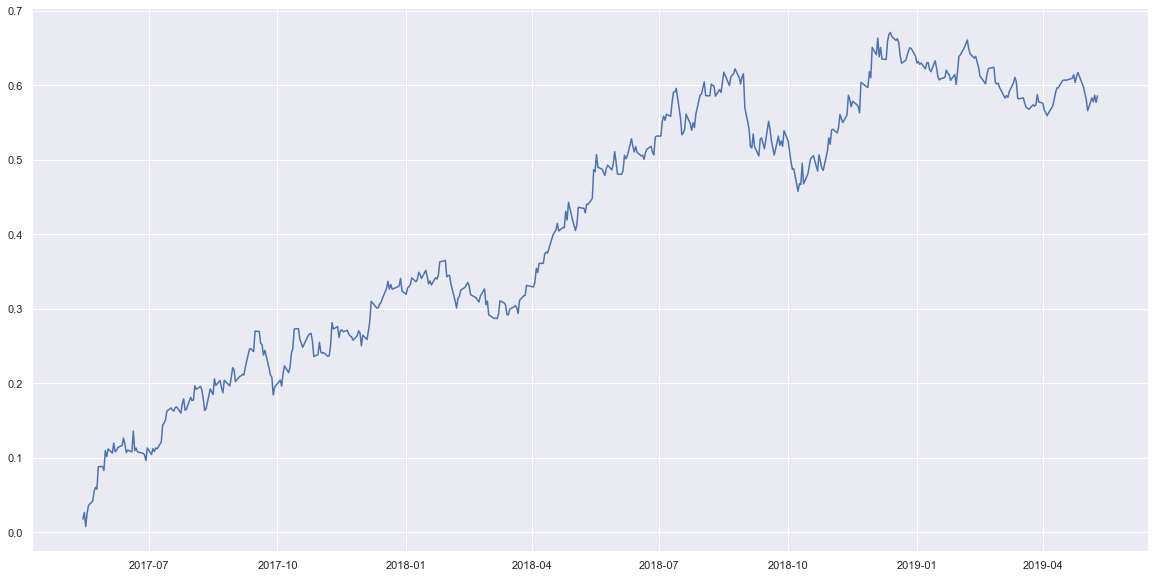

In [27]:
## plotting the net cumulative returns (in %) if we were to follow this algorithmic model
## The absolute of the Daily_Perc_change_shifted is taken, so that it cannot become positive together with the negative action.

Hul_data['Net_Cumulative_Returns']= (Hul_data['Daily_Perc_Change_Shifted'].abs()*Hul_data['Action']).dropna().cumsum()

## To use date in the x-axis of the plot we convert it to datetime type
Hul_data['Date']=pd.to_datetime(Hul_data['Date'])

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(20,10))
plt.plot(Hul_data['Date'],Hul_data['Net_Cumulative_Returns'])
